**[Link to the Data Set on Kaggle](https://www.kaggle.com/fivethirtyeight/the-ultimate-halloween-candy-power-ranking/)**

In [274]:
#importing all necessary dependencies
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## General describing of DF

In [2]:
#loading dataframe from csv file and taking a quick look
candies = pd.read_csv('candy-data.csv')
candies.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [3]:
candies.notnull().sum()

competitorname      85
chocolate           85
fruity              85
caramel             85
peanutyalmondy      85
nougat              85
crispedricewafer    85
hard                85
bar                 85
pluribus            85
sugarpercent        85
pricepercent        85
winpercent          85
dtype: int64

There are no null values, so this dataset does not need any kind of cleaning.

In [4]:
#sorting by winpercent
candies.sort_values('winpercent', ascending=False)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439
72,Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824


We are sorting all values by *winpercent* - most chosen candies. And we are seeing, that all from top 5 have the *chocolate* as an ingridient and worst 5 don't.  Seems like *chocolate* has a really big influence on the succes of the candy. *Sugar* plays unfortunately not the last role as well, as we could see same tendention like in case of *chocolate*.

In [7]:
candies.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


It's clear, **nougat and crisped rice/wafer** are less usable ingridient in analised candies. **Caramel and Peanut/Almond** are somewhere in the middle. About 25% of candies are in the **bar** form. More than 50% of the contenders are sold in candy-size bars packed in the little bags. 

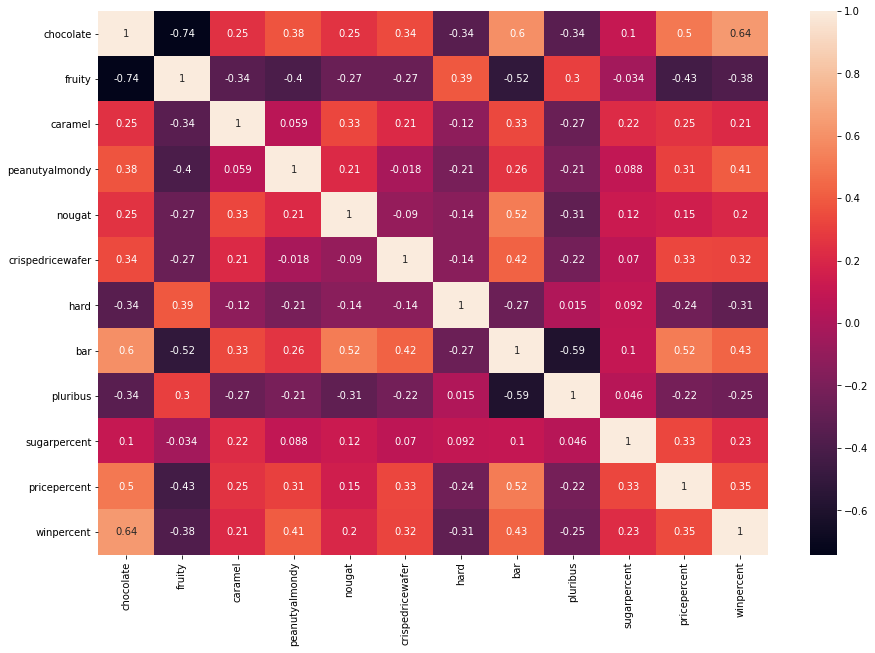

In [5]:
plt.subplots(figsize=(15,10))
sns.heatmap(candies.corr(), annot=True)

In [7]:
print("Strong correlation between winpercent and chocolate : " + str(candies['chocolate'].corr(candies["winpercent"])))
print("Strong negative correlation between fruity and chocolate : " + str(candies['chocolate'].corr(candies["fruity"])))
print("Strong negative correlation between fruity and bar : "+ str(candies['bar'].corr(candies["fruity"])))
print("Strong negative correlation between pluribus and bar : "+ str(candies['bar'].corr(candies["pluribus"])))

Strong correlation between winpercent and chocolate : 0.6365167485397072
Strong negative correlation between fruity and chocolate : -0.7417210588438842
Strong negative correlation between fruity and bar : -0.5150655814471489
Strong negative correlation between pluribus and bar : -0.5934089200049686


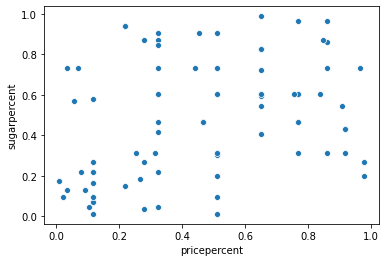

In [8]:
sns.scatterplot(x='pricepercent',y='sugarpercent', data=candies)

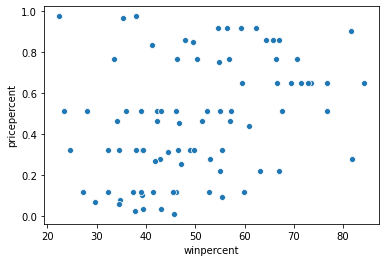

In [9]:
sns.scatterplot(x='winpercent',y='pricepercent', data=candies)

So, we don't see any kind of connection between **price/sugarpercent** and **winpercent**. We could take and average of the groups and see if there any connection an averge.

In [10]:
candies.loc[candies.sugarpercent < 0.2].describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,18.000000,18.000000,18.000000,18.000000,18.0,18.0,18.000000,18.0,18.000000,18.000000,18.000000,18.000000
mean,0.222222,0.555556,0.055556,0.055556,0.0,0.0,0.222222,0.0,0.611111,0.104778,0.246944,44.531835
std,0.427793,0.511310,0.235702,0.235702,0.0,0.0,0.427793,0.0,0.501631,0.062910,0.246144,15.729713
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.051750,0.107000,33.626398
50%,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.093000,0.116000,42.496616
75%,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.159250,0.313500,54.738077
max,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,0.197000,0.976000,81.866257


In [11]:
candies.loc[(candies.sugarpercent >= 0.2)&(candies.sugarpercent < 0.5)].describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,0.500000,0.357143,0.071429,0.178571,0.035714,0.107143,0.035714,0.357143,0.464286,0.352000,0.521964,48.977097
std,0.509175,0.487950,0.262265,0.390021,0.188982,0.314970,0.188982,0.487950,0.507875,0.090461,0.281350,12.074469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.081000,23.417824
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.293250,0.322000,41.981468
50%,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.313000,0.488000,47.501492
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.438750,0.767000,55.420679
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.465000,0.976000,76.768600


In [12]:
candies.loc[(candies.sugarpercent >= 0.5)&(candies.sugarpercent < 0.8)].describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,0.541667,0.458333,0.333333,0.250000,0.250000,0.125000,0.291667,0.416667,0.333333,0.643792,0.535375,53.337285
std,0.508977,0.508977,0.481543,0.442326,0.442326,0.337832,0.464306,0.503610,0.481543,0.070751,0.276420,17.171445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.546000,0.034000,29.703691
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.604000,0.325000,38.568408
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.604000,0.581000,51.921881
75%,1.000000,1.000000,1.000000,0.250000,0.250000,0.000000,1.000000,1.000000,1.000000,0.732000,0.758000,68.073149
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.732000,0.965000,84.180290


In [13]:
candies.loc[candies.sugarpercent >= 0.8].describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,15.000000,15.000000,15.000000,15.000000,15.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.400000,0.466667,0.200000,0.133333,0.0,0.066667,0.200000,0.066667,0.800000,0.899467,0.529733,54.926556
std,0.507093,0.516398,0.414039,0.351866,0.0,0.258199,0.414039,0.258199,0.414039,0.051800,0.240027,12.166492
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.825000,0.220000,33.437550
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.866000,0.325000,46.597532
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.906000,0.511000,55.103695
75%,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.941000,0.709000,65.034813
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.988000,0.860000,72.887901


There is a very interesting dynamics of **win percentage** with respect to *sugar* and *price percentage*. It goes up if amount of sugar and price are going up as well. 
Let's prepare data and make an informative plot to see this.

In [14]:
winpercent_sugarpercent = [candies.loc[candies.sugarpercent < 0.2].mean()[11], candies.loc[(candies.sugarpercent >= 0.2)&(candies.sugarpercent < 0.5)].mean()[11],
                            candies.loc[(candies.sugarpercent >= 0.5)&(candies.sugarpercent < 0.8)].mean()[11], candies.loc[candies.sugarpercent >= 0.8].mean()[11]]
winpercent_sugarpercent

[44.531834888888895, 48.97709667857142, 53.33728529166666, 54.92655613333333]

In [15]:
winpercent_pricepercent = [candies.loc[candies.pricepercent < 0.2].mean()[11], candies.loc[(candies.pricepercent >= 0.2)&(candies.pricepercent < 0.5)].mean()[11],
                          candies.loc[(candies.pricepercent >= 0.5)&(candies.pricepercent < 0.8)].mean()[11], candies.loc[candies.pricepercent >= 0.8].mean()[11]]
winpercent_pricepercent

[41.16648544444444, 47.88316436000001, 56.90659264285715, 53.24746307142857]

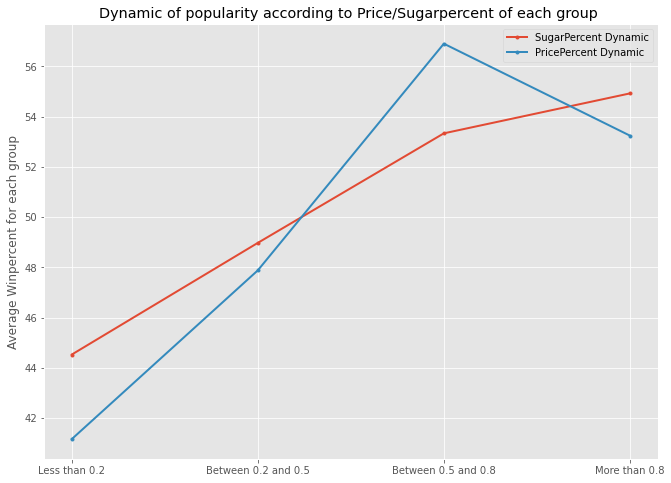

In [16]:
# using not deafult style, but ggplot-style
plt.style.use('ggplot')

#creating subplots
fig, ax = plt.subplots(figsize=(11,8))
#making x-axis
x=['Less than 0.2','Between 0.2 and 0.5', 'Between 0.5 and 0.8', 'More than 0.8']
#creating 2 lines, sugar and price respectively
line1=ax.plot(x, winpercent_sugarpercent, marker='.', linewidth=2, label="SugarPercent Dynamic")
line2=ax.plot(x, winpercent_pricepercent, marker='.', linewidth=2, label="PricePercent Dynamic")
#making plot mora fancy and redable
ax.set_title('Dynamic of popularity according to Price/Sugarpercent of each group ')
ax.set_ylabel('Average Winpercent for each group')
ax.legend()
plt.show()

As we could see, there is really some dependency between these parameters. People tend to choose more expensive candies, unless the price reaches some point and becomes too high.
Nevertheless, the sutiation with sugar looks a bit different. People prefer candies more the more sugar in it. They are really "crazy" about sugar. And we will see later, that is same about chocolate.

In [17]:
#preparing some data for the plot
choco=candies.chocolate.value_counts()
fruit=candies.fruity.value_counts()
caramel=candies.caramel.value_counts()
peanuty=candies.peanutyalmondy.value_counts()
nougat=candies.nougat.value_counts()
crisped=candies.nougat.value_counts()
hard=candies.hard.value_counts()
bar=candies.bar.value_counts()
pluribus=candies.pluribus.value_counts()

without = [choco[0],fruit[0],caramel[0],peanuty[0],nougat[0],crisped[0],hard[0],bar[0],pluribus[0]]
within = [choco[1],fruit[1],caramel[1],peanuty[1],nougat[1],crisped[1],hard[1],bar[1],pluribus[1]]

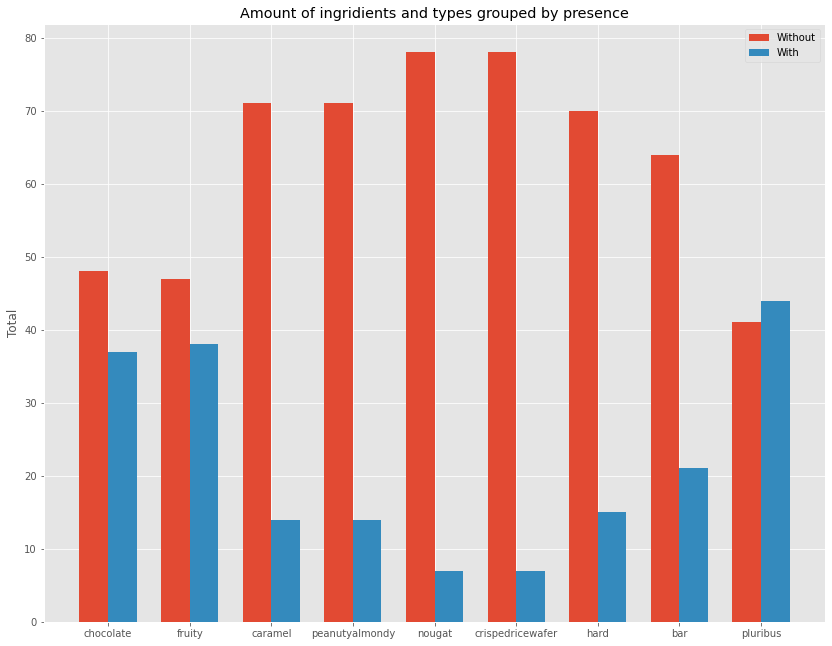

In [18]:
width = 0.35

fig, ax = plt.subplots(figsize=(14,11))

labels=candies.columns[1:10]
x = np.arange(len(labels))

width = 0.35

rects1 = ax.bar(x - width/2, without, width, label='Without')
rects2 = ax.bar(x + width/2, within, width, label='With')

ax.set_ylabel('Total')
ax.set_title('Amount of ingridients and types grouped by presence')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [19]:
candies.groupby('chocolate').mean()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,,,,,,,,,,,
0,0.770833,0.083333,0.041667,0.020833,0.000000,0.291667,0.020833,0.666667,0.452937,0.343021,42.142257
1,0.027027,0.270270,0.324324,0.162162,0.189189,0.027027,0.540541,0.324324,0.512000,0.632162,60.921529


In [20]:
candies.groupby('fruity').mean()

,chocolate,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
fruity,,,,,,,,,,,
0,0.765957,0.276596,0.297872,0.148936,0.148936,0.042553,0.446809,0.382979,0.487340,0.578957,55.327122
1,0.026316,0.026316,0.000000,0.000000,0.000000,0.342105,0.000000,0.684211,0.467895,0.332737,44.119741


It's clear, that *winpercent* of candies with chocolate in it is much higher. And *fruity* ingridients are the 'direct foes' of chocolate in our case. Chocolate candies have more often something else in it, some kind of 'taste boosters' like caramel etc. in order to make the bar more delicious.

#### We could split contenders into 4 group according to their winpercentage 
in order to design some kind of informative groups. Contesters, which recieved only between 20-35% overall votes, will belong to 1st group named 'Losers' and thus, 
36-50% are 'Try Harders', 51-65% - 'Good Spot', 66-79% - 'Amazing Spot', 80+% - 'Super Tops'.

In [21]:
def set_a_category(winpercent):
    quality_cat = []
    for chock in range(candies.winpercent.count()):
        if candies.winpercent[chock] < 36:
            quality_cat.append('Losers')
        elif (candies.winpercent[chock] >= 36) & (candies.winpercent[chock] < 51):
            quality_cat.append('Try Harders')
        elif (candies.winpercent[chock] >= 51) & (candies.winpercent[chock] < 65):
            quality_cat.append('Good Spot')
        elif (candies.winpercent[chock] >= 66) & (candies.winpercent[chock] < 80):
            quality_cat.append('Amazing Spot')
        else:
            quality_cat.append('Super Tops')

    return quality_cat

In [22]:
candies['market_spot'] = set_a_category(candies.winpercent)
candies.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,market_spot
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,Amazing Spot
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,Amazing Spot
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,Losers
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,Try Harders
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,Good Spot


In [23]:
# Create a categorical datatype for this group in order to make pandas clear that here is an order.
from pandas.api.types import CategoricalDtype

categories = ['Losers', 'Try Harders', 'Good Spot', 'Amazing Spot', 'Super Tops']

quality_cat = CategoricalDtype(categories, ordered=True)

candies['market_spot'] = candies.market_spot.astype(quality_cat)

In [24]:
candies.groupby(candies.market_spot).mean()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
market_spot,,,,,,,,,,,,
Losers,0.071429,0.500000,0.214286,0.071429,0.000000,0.000000,0.285714,0.000000,0.642857,0.394786,0.400714,30.480083
Try Harders,0.272727,0.606061,0.030303,0.060606,0.060606,0.030303,0.303030,0.151515,0.545455,0.448030,0.375091,43.058122
Good Spot,0.523810,0.476190,0.238095,0.142857,0.095238,0.095238,0.047619,0.380952,0.523810,0.509952,0.522762,56.984435
Amazing Spot,0.923077,0.076923,0.230769,0.461538,0.230769,0.230769,0.000000,0.538462,0.384615,0.577231,0.630231,70.708220
Super Tops,1.000000,0.000000,0.500000,0.500000,0.000000,0.250000,0.000000,0.250000,0.250000,0.540000,0.674000,78.351437


We see confirmation of the our theorie one more time, the higher **sugar percentage** is and **price percentage** as well, the higher the win rate is. Almost all of the winners (Amazing Spot + Super Tops) are having the chocolate as an ingredient.

In [25]:
groups=candies.market_spot.value_counts()

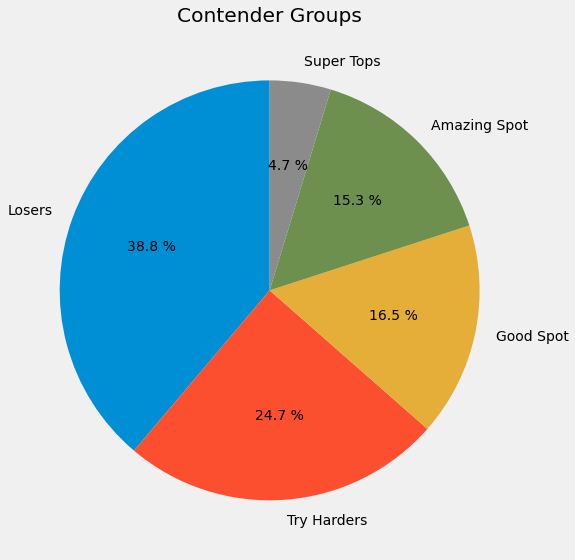

In [26]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,9))

plt.pie(groups, labels=categories, autopct='%.1f %%', startangle=90)

plt.title("Contender Groups")


plt.show()

#### Regression Analysis

In [27]:
#creating a feature column, which will be used later for representation purposes
feature_cols=candies.columns[1:12]

In [28]:
#creating a feature martix X
X = candies.drop(['competitorname','winpercent', 'market_spot'], axis=1)
print(X.shape)

(85, 11)


In [29]:
#creating a target variable (vector)
y = candies['winpercent']
print(y.shape)

(85,)


In [30]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate it
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X, y)

LinearRegression()

In [31]:
print(linreg.intercept_)
print(linreg.coef_)

34.533978414687695
[19.74806698  9.42232207  2.22448136 10.07068847  0.8043306   8.91896981
 -6.1653265   0.44154009 -0.85449954  9.08676286 -5.92836143]


In [32]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('chocolate', 19.748066977292016),
 ('fruity', 9.422322066515902),
 ('caramel', 2.224481364934587),
 ('peanutyalmondy', 10.07068846664841),
 ('nougat', 0.8043306027718092),
 ('crispedricewafer', 8.918969809827129),
 ('hard', -6.165326502166488),
 ('bar', 0.44154009420599744),
 ('pluribus', -0.8544995421467787),
 ('sugarpercent', 9.086762861511087),
 ('pricepercent', -5.9283614255458374)]

In [33]:
df = pd.DataFrame(list(zip(feature_cols, linreg.coef_)), columns=['Ingredient','Marg. effect'])
df.sort_values('Marg. effect', ascending=False)

,Ingredient,Marg. effect
0,chocolate,19.748067
3,peanutyalmondy,10.070688
1,fruity,9.422322
9,sugarpercent,9.086763
5,crispedricewafer,8.918970
2,caramel,2.224481
4,nougat,0.804331
7,bar,0.441540
8,pluribus,-0.854500
10,pricepercent,-5.928361


In other words Marginal Effect represents **how many % to winpercent** each ingredient adds

In [34]:
# Train-test-split procedure
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=148)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(63, 11)
(63,)
(22, 11)
(22,)


In [36]:
linreg.fit(X_train, y_train)

LinearRegression()

In [38]:
#Making prediction for testing set
y_pred = linreg.predict(X_test)
# and calculating accuracy of the model with the help of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

9.701598270924407


## Classification problem 1 "Creating a "Winner Candy" or maybe "Looser Candy"?"

#### Let's prepare data
- Create responce column **y** for those participant which have more then 55% positive reviews

In [39]:
y = np.array(candies.winpercent > 55)
y.shape

(85,)

In [40]:
X.shape

(85, 11)

In [41]:
#TrainTestSplit procedure
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 148, test_size=0.3) #default test_size = 0.25

#### Using LogisticRegression model

In [42]:
# import model
from sklearn.linear_model import LogisticRegression

# instantiate it
log_reg = LogisticRegression(solver='liblinear', random_state=148)

# fit the model to the training data (learn the coefficients)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=148, solver='liblinear')

In [43]:
# let's make a prediction on a test set
y_pred = log_reg.predict(X_test)

In [44]:
# we should test the model now
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.7692307692307693

In [45]:
# we could use cross-validation to see the average score of the model
cv = np.array(cross_val_score(log_reg, X, y, cv = 10))
cv.mean()

0.7638888888888888

### GridSearch for Logistic Regression

In [47]:
## Let's apply GridSearch to find best hyperparameters to tweak our Logistic Regression
from sklearn.model_selection import GridSearchCV

In [48]:
logreg = LogisticRegression()
# crearting lists for all necessary hyperparameters
penalties = ['l1', 'l2', 'elasticnet', 'none'] 
C_ = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solvers= ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iters = [100, 500 ,1000]
params = dict(penalty=penalties, C=C_, solver=solvers, max_iter=max_iters)

In [49]:
#let's instatiate the model and fit the model
logreg_gs = GridSearchCV(logreg, params, cv=10, scoring='accuracy', verbose=True, n_jobs=-1)
logreg_gs.fit(X_train, y_train)

Fitting 10 folds for each of 420 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 4076 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 4200 out of 4200 | elapsed:    7.4s finished


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=True)

In [50]:
print(logreg_gs.best_score_)
print(logreg_gs.best_params_)
print(logreg_gs.best_estimator_)

0.8333333333333334
{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(C=1, solver='newton-cg')


#### Using KNN model

In [51]:
#import model
from sklearn.neighbors import KNeighborsClassifier

#instantiate it
knn = KNeighborsClassifier(n_neighbors = 1)

#fit the model
knn.fit(X_train, y_train)

#make a prediction on a test-set
y_pred = knn.predict(X_test)

#evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.7692307692307693

Text(0, 0.5, 'Testing Accuracy')

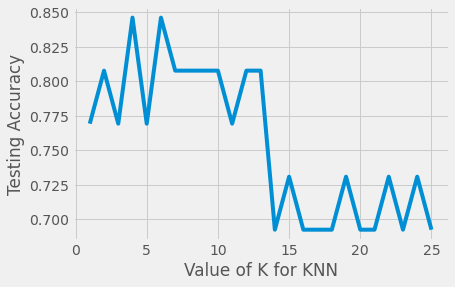

In [52]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [64]:
print("The highest accuracy {:.3f} brings the model with {} nearest neighbours".format(max(scores), scores.index(max(scores))+1))

The highest accuracy 0.846 brings the model with 4 nearest neighbours


#### Using SVM (SVC model)

In [65]:
from sklearn.svm import SVC

svclass=SVC(kernel='linear', random_state=148)

svclass.fit(X_train, y_train)

y_pred = svclass.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.7692307692307693

In [66]:
# we could use cross-validation to see the average score of the model
cv = np.array(cross_val_score(svclass, X, y, cv = 10))
cv.mean()

0.773611111111111

In [67]:
#Grid Search on SVC Model
svc=SVC()
params= {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
 'gamma' : [0.1, 1, 10, 100],
 'max_iter': [200, 500, 1000]}

In [68]:
svc_gs = GridSearchCV(svc, params, cv=10, scoring='accuracy', verbose=True, n_jobs=-1)
svc_gs.fit(X_train, y_train)

Fitting 10 folds for each of 336 candidates, totalling 3360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 3360 out of 3360 | elapsed:    5.5s finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [200, 500, 1000]},
             scoring='accuracy', verbose=True)

In [69]:
print(svc_gs.best_score_)
print(svc_gs.best_params_)
print(svc_gs.best_estimator_)

0.8166666666666668
{'C': 1, 'gamma': 0.1, 'kernel': 'linear', 'max_iter': 200}
SVC(C=1, gamma=0.1, kernel='linear', max_iter=200)


#### Using Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2, random_state=148)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.7692307692307693

In [71]:
# we could use cross-validation to see the average score of the model
cv = np.array(cross_val_score(rf, X, y, cv = 10))
cv.mean()

0.7569444444444444

In [72]:
#Grid Search on RFC
rfc = RandomForestClassifier()
params= {'criterion':['gini', 'entropy'],
         'bootstrap': [True, False],
         'max_depth': [5, 10, 20, 30, None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10],
         'n_estimators': [5,10,20,30]}

In [73]:
rfc_gs = GridSearchCV(rfc, params, cv=10, scoring='accuracy', verbose=True, n_jobs=-1)
rfc_gs.fit(X_train, y_train)

Fitting 10 folds for each of 1440 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2680 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 6680 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 12280 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 14400 out of 14400 | elapsed:  1.4min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 20, 30]},
             scoring='accuracy', verbose=True)

In [75]:
print(rfc_gs.best_score_)
print(rfc_gs.best_params_)
print(rfc_gs.best_estimator_)

0.85
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 5}
RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=5)


#### Let's create our candy and try to find if it would be popular at the market during Halloween
- It will be named 'Secret Hero' with some fancy design
- It will be with chocolate, peanuts, nougat, hard and in bar-like form, with 0.541 sugarpercent and 0.512 pricepercent with respect to other contenders

In [74]:
# dictionary comprehension to generate default set of params with 0
{col:0 for col in candies.columns}

{'competitorname': 0,
 'chocolate': 0,
 'fruity': 0,
 'caramel': 0,
 'peanutyalmondy': 0,
 'nougat': 0,
 'crispedricewafer': 0,
 'hard': 0,
 'bar': 0,
 'pluribus': 0,
 'sugarpercent': 0,
 'pricepercent': 0,
 'winpercent': 0,
 'market_spot': 0}

In [76]:
# We are filling the parameters, that we have mentioned above
sechero_params = {'chocolate': 1,
 'fruity': 0,
 'caramel': 1,
 'peanutyalmondy': 1,
 'nougat': 1,
 'crispedricewafer': 0,
 'hard': 1,
 'bar': 1,
 'pluribus': 0,
 'sugarpercent': 0.541,
 'pricepercent': 0.512}

#Creating a data frame in order to make prediction easier 
secret_hero = pd.DataFrame(data=[sechero_params])
secret_hero

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
0,1,0,1,1,1,0,1,1,0,0.541,0.512


In [77]:
#We will use SupportVectorMachine, RandomForestClassifier and LogisticRegression, because they have given best results in the test-phase
print("Support Vector Machine: " + str(list(svc_gs.predict(secret_hero))))
print("Logistic Regression: " + str(list(logreg_gs.predict(secret_hero))))
print("Random Forest: " + str(list(rfc_gs.predict(secret_hero))))

Support Vector Machine: [True]
Logistic Regression: [True]
Random Forest: [True]


#### So it's reasonable to say **our candy** could be popular during the halloween time

##### What if we create a lowsugared-fruity with some crispy stuff healthy style bar **'Fruity Boom'**. What can we expect?

In [78]:
fruityboom_params = {'chocolate': 0,
 'fruity': 1,
 'caramel': 0,
 'peanutyalmondy': 0,
 'nougat': 0,
 'crispedricewafer': 1,
 'hard': 1,
 'bar': 1,
 'pluribus': 1,
 'sugarpercent': 0.314,
 'pricepercent': 0.350}

In [79]:
fruity_boom = pd.DataFrame(data=[fruityboom_params])
fruity_boom

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
0,0,1,0,0,0,1,1,1,1,0.314,0.35


In [80]:
#We will use SupportVectorMachine and LogisticRegression, because they have given best results in the test-phase
print("Support Vector Machine:" + str(list(svc_gs.predict(fruity_boom))))
print("Logistic Regression:" + str(list(logreg_gs.predict(fruity_boom))))
print("Random Forest: " + str(list(rfc_gs.predict(fruity_boom))))

Support Vector Machine:[False]
Logistic Regression:[False]
Random Forest: [False]


#### *As we can see: kids probably won't love **our healthy bar**.*

## Classification problem 2 "I bet we can guess whether candy with chocolate or not!"

#### Let's prepare the variables

In [81]:
X = candies.drop(['competitorname','chocolate', 'market_spot'], axis=1)
print(X.shape)
#creating a target variable (vector)
y = candies['chocolate']
print(y.shape)

(85, 11)
(85,)


In [84]:
#Train Test Split procedure
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 148, test_size=0.3)

#### Testing the Logistic Regression Model

In [106]:
# instantiating a Logistic regression model
logreg = LogisticRegression(solver='liblinear', max_iter=200, random_state=148)

# and fitting it
logreg.fit(X_train, y_train)

# predicting 
y_pred = logreg.predict(X_test)

# and computing accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.8846153846153846

In [107]:
# we could use cross-validation to see the average score of the model
cv = np.array(cross_val_score(logreg, X, y, cv = 10))
cv.mean()

0.8902777777777778

In [110]:
logreg2 = LogisticRegression()
# crearting lists for all necessary hyperparameters
penalties = ['l1', 'l2', 'elasticnet', 'none'] 
C_ = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solvers= ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iters = [100, 500 ,1000]
params2 = dict(penalty=penalties, C=C_, solver=solvers, max_iter=max_iters)

In [111]:
#let's instatiate the model and fit the model
logreg_gs2 = GridSearchCV(logreg2, params2, cv=10, scoring='accuracy', verbose=True, n_jobs=-1)
logreg_gs2.fit(X_train, y_train)

Fitting 10 folds for each of 420 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 4200 out of 4200 | elapsed:   10.4s finished


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=True)

In [112]:
print(logreg_gs2.best_score_)
print(logreg_gs2.best_params_)
print(logreg_gs2.best_estimator_)

0.9133333333333334
{'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(C=10, solver='newton-cg')


#### Testing KNN model

In [113]:
#instantiate knn model
knn = KNeighborsClassifier()

#fit the model
knn.fit(X_train, y_train)

#make a prediction on a test-set
y_pred = knn.predict(X_test)

#evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.8461538461538461

Text(0, 0.5, 'Testing Accuracy')

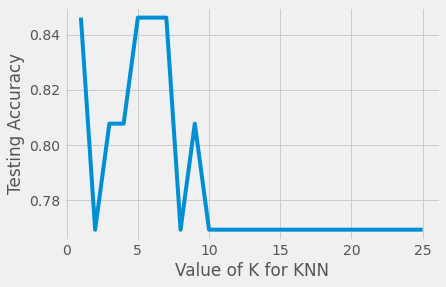

In [114]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [115]:
# we could use cross-validation to see the average score of the model
cv = np.array(cross_val_score(knn, X, y, cv = 10))
cv.mean()

0.7708333333333333

In [116]:
print("The highest accuracy {:.3f} brings the model with {} nearest neighbours".format(max(scores), scores.index(max(scores))+1))

The highest accuracy 0.846 brings the model with 1 nearest neighbours


#### Testing SVM (SVC model)

In [117]:
svc=SVC(kernel='linear', random_state=148)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.8461538461538461

In [118]:
# we could use cross-validation to see the average score of the model
cv = np.array(cross_val_score(svc, X, y, cv = 10))
cv.mean()

0.8777777777777779

In [122]:
#Grid Search on SVC Model
svc2=SVC()
params2= {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
 'gamma' : [0.1, 1, 10, 100],
 'max_iter': [200, 500, 1000]}

In [124]:
svc_gs2 = GridSearchCV(svc2, params2, cv=10, scoring='accuracy', verbose=True, n_jobs=-1)
svc_gs2.fit(X_train, y_train)

Fitting 10 folds for each of 336 candidates, totalling 3360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 3360 out of 3360 | elapsed:    5.9s finished
D:\Soft\Anaconda3\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [200, 500, 1000]},
             scoring='accuracy', verbose=True)

In [125]:
print(svc_gs2.best_score_)
print(svc_gs2.best_params_)
print(svc_gs2.best_estimator_)

0.9133333333333334
{'C': 1, 'gamma': 0.1, 'kernel': 'linear', 'max_iter': 500}
SVC(C=1, gamma=0.1, kernel='linear', max_iter=500)


#### Testing Random Forest Model

In [119]:
rfc = RandomForestClassifier(random_state=148)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.8461538461538461

In [120]:
# we could use cross-validation to see the average score of the model
cv = np.array(cross_val_score(rfc, X, y, cv = 10))
cv.mean()

0.8902777777777778

In [126]:
#Grid Search on RFC
rfc2 = RandomForestClassifier()
params2= {'criterion':['gini', 'entropy'],
         'bootstrap': [True, False],
         'max_depth': [5, 10, 20, 30, None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10],
         'n_estimators': [5,10,20,30]}

In [127]:
rfc_gs2 = GridSearchCV(rfc2, params2, cv=10, scoring='accuracy', verbose=True, n_jobs=-1)
rfc_gs2.fit(X_train, y_train)

Fitting 10 folds for each of 1440 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1320 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 3320 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 6120 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 9720 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 14120 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 14400 out of 14400 | elapsed:  1.4min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 20, 30]},
             scoring='accuracy', verbose=True)

In [128]:
print(rfc_gs2.best_score_)
print(rfc_gs2.best_params_)
print(rfc_gs2.best_estimator_)

0.9666666666666668
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20}
RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       n_estimators=20)


#### Seems like all models performing on this problem pretty good
Comparing others, KNN is underperforming a little bit. But according to Cross Validation Score Random Forest and Logistic Regression are the leaders. It is better to use hyperparameter tuning here, as we did, because there is an improvement of the scores. In the end we have a clear leader - RFC.

In [135]:
chock1 = {'fruity': 1,
 'caramel': 0,
 'peanutyalmondy': 0,
 'nougat': 0,
 'crispedricewafer': 1,
 'hard': 0,
 'bar': 1,
 'pluribus': 1,
 'sugarpercent': 0.3,
 'pricepercent': 0.4,
 'winpercent': 55}

In [136]:
chock_or_not1 = pd.DataFrame(data=[chock1])
chock_or_not1

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,0,0,1,0,1,1,0.3,0.4,55


In [137]:
#We will use SupportVectorMachine and LogisticRegression, Random Forest because they have given best results in the test-phase
print("Support Vector Machine:" + str(list(svc_gs2.predict(chock_or_not1))))
print("Logistic Regression:" + str(list(logreg_gs2.predict(chock_or_not1))))
print("Random Forest:" + str(list(rfc_gs2.predict(chock_or_not1))))

Support Vector Machine:[1]
Logistic Regression:[0]
Random Forest:[0]


In [138]:
chock2 = {'fruity': 0,
 'caramel': 1,
 'peanutyalmondy': 1,
 'nougat': 0,
 'crispedricewafer': 0,
 'hard': 1,
 'bar': 0,
 'pluribus': 0,
 'sugarpercent': 0.4,
 'pricepercent': 0.54,
 'winpercent': 60}

In [140]:
chock_or_not2 = pd.DataFrame(data=[chock2])
chock_or_not2

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,0,1,1,0,0,1,0,0,0.4,0.54,60


In [141]:
#We will use SupportVectorMachine and LogisticRegression, Random Forest because they have given best results in the test-phase
print("Support Vector Machine:" + str(list(svc_gs2.predict(chock_or_not2))))
print("Logistic Regression:" + str(list(logreg_gs2.predict(chock_or_not2))))
print("Random Forest:" + str(list(rfc_gs2.predict(chock_or_not2))))

Support Vector Machine:[1]
Logistic Regression:[1]
Random Forest:[1]


As we could expect, fruits in 1st case are "direct foes" of chocolate, so it is very unlikely that in these candies we could meet chocolate. 2 of 3 models have voted for lack of the chocolate. Moreover, the vote of RFC is the most important, because it has the highest accuracy score.
In the 2nd case all three model have the same desicion, so it is very likely to be chocolate in this candy.

## Keras Part (Classification 1 )

In [142]:
# importing necessary libs and classes
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras

Using TensorFlow backend.


In [143]:
#using standard Scaler form sklearn library in order to scale our data, because Keras awaits scaled input data
## We have already imported standard scaler on the top of our notebook

#instantiating class
scaler = StandardScaler().fit(X_train)
#scling train data
X_train = scaler.transform(X_train)
#repeating the same procedure with out test data
X_test = scaler.transform(X_test)  

In [254]:
#instantiating the sequantial model with 1 input 1 output and 1 hidden layer with 32,1,32 nodes respectively
model = Sequential()
model.add(Dense(11, activation='relu', input_shape=(11,)))
model.add(Dense(22, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [255]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_26 (Dense)             (None, 22)                264       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 23        
Total params: 419
Trainable params: 419
Non-trainable params: 0
_________________________________________________________________
None


In [256]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [257]:
model.fit(X_train, y_train,epochs=10, batch_size=1, verbose=1)

Epoch 1/10
59/59 [==============================] - 0s 4ms/step - loss: 0.5211 - accuracy: 0.7797
Epoch 2/10
59/59 [==============================] - 0s 3ms/step - loss: 0.4219 - accuracy: 0.8305
Epoch 3/10
59/59 [==============================] - 0s 3ms/step - loss: 0.3534 - accuracy: 0.8136
Epoch 4/10
59/59 [==============================] - 0s 3ms/step - loss: 0.3081 - accuracy: 0.8475
Epoch 5/10
59/59 [==============================] - 0s 3ms/step - loss: 0.2752 - accuracy: 0.8475
Epoch 6/10
59/59 [==============================] - 0s 3ms/step - loss: 0.2491 - accuracy: 0.9153
Epoch 7/10
59/59 [==============================] - 0s 3ms/step - loss: 0.2308 - accuracy: 0.9153
Epoch 8/10
59/59 [==============================] - 0s 3ms/step - loss: 0.2143 - accuracy: 0.9492
Epoch 9/10
59/59 [==============================] - 0s 3ms/step - loss: 0.2009 - accuracy: 0.9661
Epoch 10/10
59/59 [==============================] - 0s 3ms/step - loss: 0.1855 - accuracy: 0.9661


In [258]:
y_pred = model.predict_classes(X_test)

In [259]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

26/26 [==============================] - 0s 806us/step
[0.29302215576171875, 0.8846153616905212]


In [260]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[12  1]
 [ 2 11]]


In [276]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {:.2f}% '.format(scores[1]*100))
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {:.2f}% '.format(scores2[1]*100))

Accuracy on training data: 96.61% 
Accuracy on test data: 88.46% 


In [262]:
sechero = scaler.transform(secret_hero)
sechero

array([[ 1.05220856, -0.42426407,  2.52487623,  3.70809924,  2.97209242,
        -0.45175395,  1.71269768,  0.95038193, -1.80618495,  0.28061781,
        -3.49080887]])

In [263]:
fruboom=scaler.transform(fruity_boom)
fruboom

array([[-0.95038193,  2.3570226 , -0.39605902, -0.26967994, -0.33646329,
         2.21359436,  1.71269768,  0.95038193,  1.8045938 , -0.51462432,
        -3.50198123]])

In [264]:
sechero_y = model.predict_classes(sechero)
fruboom_y = model.predict_classes(fruboom)

In [273]:
print("Our model give us next result:")
print("Likely class of 'Secret Hero' is: ", sechero_y)
print("Likely class of 'Fruity Boom' is: ", fruboom_y)
print("Thus, that means, that here the decision is similar to sklearn's models results")

Our model give us next result:
Likely class of 'Secret Hero' is:  [[1]]
Likely class of 'Fruity Boom' is:  [[0]]
Thus, that means, that here the decision is similar to sklearn's models results


## Conclussions:

- Chocolate is the most valuable ingredient fo the candy. Almost all of the candies, which have the highest choosing-rate, are containing chocolate.
- Though, people are not so interested in fruity candies.
- Chocolate with fruits is not very popular combination.
- People tend to choose on average more expensive and sweeter candies. The principle: "The more the better" works unfortunately perfect only with sugar, but it works worse with price till some price level.
- The dataset is really small, we could say even tiny, to train good models and make close-to-reality predictions, but the perfomances of models not so bad as we could think.
- We have received same results with Keras, but they could be way different, because of our small sample size, where neural networks always underperform. Complexity of the problem is not so high as well, what could have an influence on results as well.